# The Magic and Mystery of Numbers. Martin Gardner - Scientific American

## The remarkable lore of prime numbers

### Stanislaw M. Ulam: display primes in spiral out from center makes diagonal line segments

In [1]:
import os
import sys
import time

import numpy as np

from IPython.display import display
import ipywidgets as widgets

sys.path.insert(1, '../src')
import numcolorpy as ncp

def get_primes_glyfic(n, n_start=1, prime_sym=" * ", not_prime_sym='   '):
    """ Usage: glyfic_str = get_primes_glyfic(n, n_start=1, prime_sym=" * ", not_prime_sym='   ') 
    printable string view of pattern of primes
    """
    glyfic_str = ''

    spiral_primes_mask, top_prime, num_primes = get_spiral_primes_mask(n, n_start)
    actual_number_of_primes = spiral_primes_mask.sum()
    
    for k in range(0, spiral_primes_mask.shape[0]):
        r = spiral_primes_mask[k,:]
        row_str = ''
        for c in r:
            if c == 1:
                row_str += prime_sym
            else:
                row_str += not_prime_sym

        glyfic_str += row_str + '\n'
        
    return glyfic_str

def show_str_print_primes(n, n_start=1, sym=" * ", not_sym = '   '):
    print(get_primes_glyfic(n, n_start, sym, not_sym))
    
    
def get_prime_number_theorem_estimate(n):
    """ Usage: max_number_of_primes = get_prime_number_theorem_upper_limit(n) """
    return np.ceil(n / np.log(n))


def get_spiral_primes_mask(number_rows_cols=7, n_start=1, clockwise=True):
    """ Usage: spiral_primes_mask = get_spiral_primes_mask(number_rows_cols, clockwise) """
    spiral_primes_mask = spiral_raster_index(number_rows_cols, n_start, clockwise, just_primes=True)
    top_prime = spiral_primes_mask.max()
    num_primes = (spiral_primes_mask != 0).sum()
    return spiral_primes_mask.astype(bool).astype(int), top_prime, num_primes


def is_prime(x):
    """ Usage: T_er_F = is_prime(x) """
    if x < 2 or np.mod(x, 2) == 0:
        return False
    sq = x // np.sqrt(x)
    if np.mod(sq, 2) == 0:
        sq -= 1
    for d in range(3, int(sq)+1, 2):
        if np.mod(x, d) == 0:
            return False
    return True


def spiral_raster_index(number_rows_cols=7, n_start=1, clockwise=True, just_primes=False):
    """ Usage: spiral_raster_matrix = spiral_raster_index(number_rows_cols) """
    number_rows_cols_is_even = False
    if np.mod(number_rows_cols, 2) == 0:
        number_rows_cols_is_even = True
        number_rows_cols += 1
        
    spir_ras_mat = np.zeros((number_rows_cols, number_rows_cols))
    r = number_rows_cols // 2
    if clockwise == False:
        rd = 1
    else:
        rd = -1
    c = number_rows_cols // 2
    cd = -1
    rows = [r]
    cols = [c]
    n = max(n_start - 1, 0)
    maxn = number_rows_cols**2
    
    while n < maxn and r >= 0 and r < number_rows_cols:
        for c in cols:
            n += 1
            if just_primes == False or is_prime(n):
                spir_ras_mat[r,c] = n
            
        cd *= (-1)
        c += cd
        cols.append(c)
        cols.reverse()
        
        if c < 0 or c >= number_rows_cols:
            break
        
        for r in rows:
            n += 1
            if just_primes == False or is_prime(n):
                spir_ras_mat[r,c] = n
            
        rd *= (-1)
        r += rd
        rows.append(r)
        rows.reverse()
        
    if number_rows_cols_is_even == True:
        if clockwise == True:
            spir_ras_mat = spir_ras_mat[1:, 1:]
        else:
            spir_ras_mat = spir_ras_mat[:-1, 1:]
            
    return spir_ras_mat.astype(int)    


prime number theorem estimate: 13353.0 
primes found 14525 
largest_found 161323 
smallest_prime 1733 
running time: 4.0727550983428955


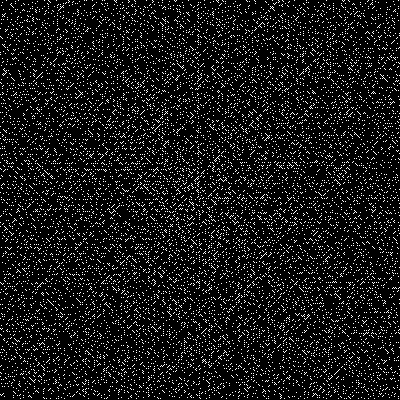

In [2]:
n = 400
#                 run time is big O of n^2
n_start = 1733

t0 = time.time()
spiral_primes_mask, top_prime, num_primes = get_spiral_primes_mask(n, n_start)

tt = time.time() - t0
print('prime number theorem estimate:', get_prime_number_theorem_estimate(n**2), 
      '\nprimes found', num_primes, 
      '\nlargest_found', top_prime, 
      '\nsmallest_prime', n_start, 
      '\nrunning time:', tt)

spir_primes_Image = ncp.gray_mat(spiral_primes_mask)
display(spir_primes_Image)

In [3]:
show_str_print_primes(n=36, n_start=1, sym=" * ", not_sym = '   ')

       *                       *                                   *           *                 *          
                *     *                 *                                                     *             
                         *           *                 *                 *                             *    
                                  *     *           *     *                             *                 * 
 *     *                       *                             *                       *                 *    
          *     *                 *                 *           *     *                                   * 
             *           *                                   *     *                                        
    *     *     *     *                             *     *                 *                 *     *       
                                     *     *           *                 *           *                 *    
    *              

In [4]:
%whos

Variable                            Type        Data/Info
---------------------------------------------------------
display                             function    <function display at 0x104e13a60>
get_prime_number_theorem_estimate   function    <function get_prime_numbe<...>_estimate at 0x10a722f28>
get_primes_glyfic                   function    <function get_primes_glyfic at 0x108cbbbf8>
get_spiral_primes_mask              function    <function get_spiral_primes_mask at 0x10a727048>
is_prime                            function    <function is_prime at 0x10a7270d0>
n                                   int         400
n_start                             int         1733
ncp                                 module      <module 'numcolorpy' from '../src/numcolorpy.py'>
np                                  module      <module 'numpy' from '/Li<...>kages/numpy/__init__.py'>
num_primes                          int64       14525
os                                  module      <module 'os' from